In [18]:
import numpy as np
import pandas as pd

In [19]:
df = pd.read_excel("/Users/allysonchoi/Dropbox/OEE LAB HQ/EXCEL/kunec2015-CodonPairBias.xlsx")
df.head()

,AA pair,Codon pair,Homo sapiens,Sus scrofa,Mus musculus,Gallus gallus,Danio rerio,Anoph. gambiae,Aedes aegypti,Culex quinque-fasciatus,Ixodes scapularis
0,AA,GCG-GCG,1.522098,1.304985,1.530467,1.636339,0.869486,-0.179276,0.179966,0.129846,0.463406
1,AA,GCG-GCC,0.570571,0.492843,0.405270,0.507412,-0.026867,0.264576,0.209838,0.190489,0.197384
2,AA,GCT-GCT,0.397426,0.434101,0.367578,0.345235,0.336549,1.013483,0.415552,0.660698,0.561282
3,AA,GCA-GCA,0.380203,0.422073,0.346656,0.299507,0.443703,0.668531,0.356392,0.697337,0.248499
4,AA,GCA-GCT,0.357302,0.418239,0.297456,0.138927,0.154547,0.065729,0.272219,0.473857,0.194678


In [20]:
df['Homo sapiens'] = pd.to_numeric(df['Homo sapiens'])
df['Aedes aegypti'] = pd.to_numeric(df['Aedes aegypti'])

In [21]:
cols = list(df.columns)
cols

['AA pair',
 'Codon pair',
 'Homo sapiens',
 'Sus scrofa',
 'Mus musculus',
 'Gallus gallus',
 'Danio rerio',
 'Anoph. gambiae',
 'Aedes aegypti',
 'Culex quinque-fasciatus',
 'Ixodes scapularis']

In [22]:
df1 = df[cols[0:3]+[cols[8]]]
df1

,AA pair,Codon pair,Homo sapiens,Aedes aegypti
0,AA,GCG-GCG,1.522098,0.179966
1,AA,GCG-GCC,0.570571,0.209838
2,AA,GCT-GCT,0.397426,0.415552
3,AA,GCA-GCA,0.380203,0.356392
4,AA,GCA-GCT,0.357302,0.272219
...,...,...,...,...
3716,YW,TAT-TGG,-0.652805,-0.036711
3717,YY,TAC-TAC,0.233209,0.140339
3718,YY,TAC-TAT,-0.021010,0.017375
3719,YY,TAT-TAT,-0.074534,-0.234988


In [23]:
df_sorted = df1.loc[df1["AA pair"]=="EH"] 
df_sorted = df_sorted.append(df1.loc[df1["AA pair"]=="ER"] )
df_sorted = df_sorted.append(df1.loc[df1["AA pair"]=="HR"] )
df_sorted = df_sorted.append(df1.loc[df1["AA pair"]=="RR"] )
df_sorted

/var/folders/_k/kltccj5528dbbmwwh5mxbv9h0000gn/T/ipykernel_9102/2321423807.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sorted = df_sorted.append(df1.loc[df1["AA pair"]=="ER"] )
/var/folders/_k/kltccj5528dbbmwwh5mxbv9h0000gn/T/ipykernel_9102/2321423807.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sorted = df_sorted.append(df1.loc[df1["AA pair"]=="HR"] )
/var/folders/_k/kltccj5528dbbmwwh5mxbv9h0000gn/T/ipykernel_9102/2321423807.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sorted = df_sorted.append(df1.loc[df1["AA pair"]=="RR"] )


,AA pair,Codon pair,Homo sapiens,Aedes aegypti
520,EH,GAA-CAT,0.233883,-0.014448
521,EH,GAG-CAC,0.137189,0.134064
522,EH,GAG-CAT,-0.109773,0.102972
523,EH,GAA-CAC,-0.338189,-0.176604
564,ER,GAA-AGA,0.341888,-0.168360
...,...,...,...,...
2577,RR,CGA-CGG,-0.569495,-0.100029
2578,RR,CGT-AGA,-0.658410,-0.132301
2579,RR,CGT-AGG,-0.847180,-0.470776
2580,RR,AGA-CGC,-0.912250,-0.307798


In [24]:
df_sorted.reset_index(drop=True, inplace=True)
df_sorted

,AA pair,Codon pair,Homo sapiens,Aedes aegypti
0,EH,GAA-CAT,0.233883,-0.014448
1,EH,GAG-CAC,0.137189,0.134064
2,EH,GAG-CAT,-0.109773,0.102972
3,EH,GAA-CAC,-0.338189,-0.176604
4,ER,GAA-AGA,0.341888,-0.168360
...,...,...,...,...
59,RR,CGA-CGG,-0.569495,-0.100029
60,RR,CGT-AGA,-0.658410,-0.132301
61,RR,CGT-AGG,-0.847180,-0.470776
62,RR,AGA-CGC,-0.912250,-0.307798


In [25]:
df_filtered = df_sorted.loc[df_sorted["Codon pair"]=="GAG-CAC"]
df_filtered = df_filtered.append(df_sorted.loc[df_sorted["Codon pair"]=="GAG-CGC"])
df_filtered = df_filtered.append(df_sorted.loc[df_sorted["Codon pair"]=="GAA-CGG"])
df_filtered = df_filtered.append(df_sorted.loc[df_sorted["Codon pair"]=="CAC-AGA"])
df_filtered = df_filtered.append(df_sorted.loc[df_sorted["Codon pair"]=="CGC-AGA"])
df_filtered = df_filtered.append(df_sorted.loc[df_sorted["Codon pair"]=="CGG-AGA"])
df_filtered

/var/folders/_k/kltccj5528dbbmwwh5mxbv9h0000gn/T/ipykernel_9102/2158673534.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered = df_filtered.append(df_sorted.loc[df_sorted["Codon pair"]=="GAG-CGC"])
/var/folders/_k/kltccj5528dbbmwwh5mxbv9h0000gn/T/ipykernel_9102/2158673534.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered = df_filtered.append(df_sorted.loc[df_sorted["Codon pair"]=="GAA-CGG"])
/var/folders/_k/kltccj5528dbbmwwh5mxbv9h0000gn/T/ipykernel_9102/2158673534.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered = df_filtered.append(df_sorted.loc[df_sorted["Codon pair"]=="CAC-AGA"])
/var/folders/_k/kltccj5528dbbmwwh5mxbv9h0000gn/T/ipykernel_9102/2158673534.py:5: FutureWarning: The 

,AA pair,Codon pair,Homo sapiens,Aedes aegypti
1,EH,GAG-CAC,0.137189,0.134064
7,ER,GAG-CGC,0.127753,-0.073484
14,ER,GAA-CGG,-0.661175,0.153560
20,HR,CAC-AGA,0.160849,-0.344975
58,RR,CGC-AGA,-0.506265,-0.136675
51,RR,CGG-AGA,-0.285582,0.038977


In [26]:
df_filtered["codon_pair"] = df_filtered["Codon pair"]+ (str('(') + (df_filtered["AA pair"]) + str(')'))
df_filtered

,AA pair,Codon pair,Homo sapiens,Aedes aegypti,codon_pair
1,EH,GAG-CAC,0.137189,0.134064,GAG-CAC(EH)
7,ER,GAG-CGC,0.127753,-0.073484,GAG-CGC(ER)
14,ER,GAA-CGG,-0.661175,0.153560,GAA-CGG(ER)
20,HR,CAC-AGA,0.160849,-0.344975,CAC-AGA(HR)
58,RR,CGC-AGA,-0.506265,-0.136675,CGC-AGA(RR)
51,RR,CGG-AGA,-0.285582,0.038977,CGG-AGA(RR)


In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

### For Homosapien CPS:

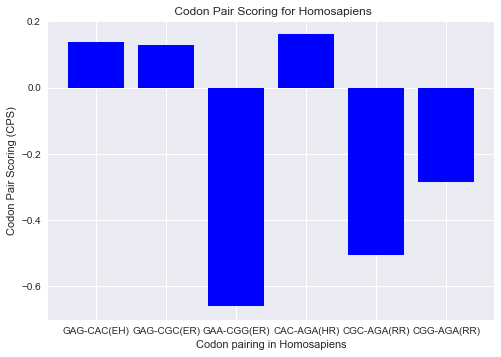

In [28]:
codon_pair = df_filtered["codon_pair"]


fig1 = plt.bar(codon_pair, df_filtered["Homo sapiens"], color=["blue"]) #plt.bar (x, y)
plt.xlabel("Codon pairing in Homosapiens")
plt.ylabel("Codon Pair Scoring (CPS)")
plt.tick_params(axis='x')
plt.style.use('seaborn')
plt.title(" Codon Pair Scoring for Homosapiens")

#always call 'savefig' before plt.show(), or not you'd be saving an empty plot
#plt.savefig("homosapien_CPS.png")

plt.show()

#plt.savefig("homosapien_CPS.png")

### For Aedes aegypti CPS:

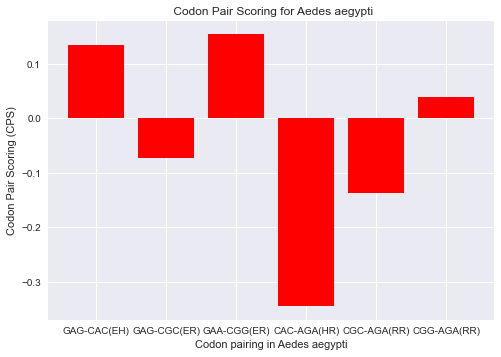

In [29]:
import matplotlib.pyplot as plt

codon_pair = df_filtered["codon_pair"]


plt.bar(codon_pair, df_filtered["Aedes aegypti"], color=["red"]) #plt.bar (x, y)
plt.xlabel("Codon pairing in Aedes aegypti")
plt.ylabel("Codon Pair Scoring (CPS)")
plt.style.use('seaborn')
plt.tick_params(axis='x')
plt.title(" Codon Pair Scoring for Aedes aegypti")

#plt.savefig("Aedesaegypti_CPS.png")

plt.show()

#

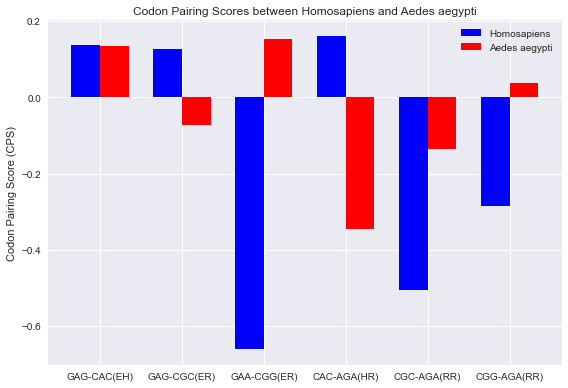

In [30]:
import matplotlib.pyplot as plt
import numpy as np

codon_pair = df_filtered["codon_pair"]
Homo_sapiens = df_filtered["Homo sapiens"]
Aedes_aegypti = df_filtered["Aedes aegypti"]

x = np.arange(len(codon_pair))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Homo_sapiens, width, label='Homosapiens', color = "blue")
rects2 = ax.bar(x + width/2, Aedes_aegypti, width, label='Aedes aegypti', color = "red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Codon Pairing Score (CPS)')
ax.set_title('Codon Pairing Scores between Homosapiens and Aedes aegypti')
ax.set_xticks(x, codon_pair)
ax.legend()

fig.tight_layout()


#plt.savefig("Homosapien-VS-Aedesaegypti_CPS.png")

plt.show()



## For Export:

In [31]:
#df_sorted.to_csv("CPS-homosapien-aedesaegypti.csv", index=False)

In [32]:
#df_filtered.to_csv("CPS-homosapien-aedesaegypti-relevant.csv", index=False)